# MOVIELENS RECOMMENDATION SYSTEM

## Introduction
In today's world of countless movie options, it can be challenging for users to find movies that match their preferences.Streaming platforms like Netflix have provided a way of people to consume entertainment.However, with the extensive library of content, users have a difficult time finding shows that align with their preference. Recommendation systems come to the rescue by offering personalized movie recommendations based on user ratings.In this task, I aim to build a recommendation system using the MovieLens dataset to provide users with their top 5 movie recommendations.

## Business Understanding
The objective is to build a recommendation system for Netflix to deliver seemless and personalized user experience by offering accurate movie and TV recommendations. As the Data Scientist involved my goal of this recommendation system is to enhance the movie-watching experience for users by suggesting movies that they are likely to enjoy based on their ratings of other movies. By offering personalized recommendations, one can increase user engagement, satisfaction, and ultimately drive user retention on the platform.
The Stakeholders are:
- Netflix Users - The primary stakeholders, since they rely on the recommendation system to enjoy relevant movies based on their preferences.
- Netflix Management and Executives - They are interested in improving the user satisfaction, increase viewership and maximize revenue.

## Problem Statement
The problem is to build a recommendation system that can accurately predict and recommend the top 5 movies for a user based on their ratings of other movies. The system should leverage collaborative filtering techniques and content based filtering techniques to analyze user preferences and generate accurate recommendations.

## Metric of success
Root Mean Squared Error (RMSE): RMSE is a commonly used evaluation metric for recommendation systems that deal with explicit ratings. It measures the average magnitude of the differences between the predicted ratings and the actual ratings given by users. A lower RMSE indicates better accuracy and performance of the recommendation system.

Mean Absolute Error (MAE): MAE is another widely used metric for recommendation systems. It calculates the average absolute difference between the predicted ratings and the actual ratings. MAE provides a measure of how well the recommendation system can estimate user preferences without considering the direction of the errors. Like RMSE, a lower MAE indicates better accuracy and performance of the recommendation system.

## Data Exploration

### Data Understanding
The Data sourced for this project was the "movielens Dataset" which was sourced from grouplens.org/datasets/movielens.
The dataset includes:

`ratings.csv`: This file contains user ratings for movies. It includes the following columns:
- **userId**: The ID of the user who provided the rating.
- **movieId**: The ID of the movie being rated.
- **rating**: The rating given by the user to the movie (on a scale of 0.5 to 5 in increments of 0.5).
- **timestamp**: The timestamp when the rating was recorded.

`movies.csv`: This file contains information about movies. It includes the following columns:
- **movieId**: The ID of the movie.
- **title**: The title of the movie along with the release year.
- **genres**: The genre(s) of the movie, separated by "|" if multiple genres apply.

`tags.csv`:This file contains user-generated tags for movies.
Each row represents a specific tag assigned by a user to a movie.

`links.csv`:This file contains links to external movie databases (IMDb and TMDB).


**Importing Libraries**

In [3]:
## DataFrame Manipulation
import pandas as pd
import numpy as np

## For visualization
import matplotlib.pyplot as plt
import seaborn as sns

## For the building the models
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import SVD
from surprise import NMF
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic, KNNBaseline
from surprise.model_selection import GridSearchCV
from surprise import accuracy
import tensorflow as tf

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
## Train test split
from surprise.model_selection import train_test_split






### Loading and Exploring the data

Exploring the data to get a glimpse of:
- **Reading the datasets**
- **Info of the data**
- **Shape of the data**
- **Missing values**
- **The duplicates**
- **Statistical summary of the data**

**Ratings.csv - Data Exploration**

In [4]:
ratings_df = pd.read_csv("Data/ratings.csv")
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [6]:
ratings_df.shape

(100836, 4)

In [7]:
ratings_df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [8]:
ratings_df.duplicated().sum()

0

In [9]:
ratings_df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


**Movies.csv - Data Exploration**

In [10]:
movies_df = pd.read_csv("Data/movies.csv")
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [11]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [12]:
movies_df.shape

(9742, 3)

In [13]:
movies_df.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [14]:
movies_df.duplicated().sum()

0

**Tags.csv -Data Exploration**

In [15]:
tags_df = pd.read_csv("Data/tags.csv")
tags_df.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [16]:
tags_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [17]:
tags_df.shape

(3683, 4)

**Links_csv -Data Exploration**

In [18]:
links_df = pd.read_csv("Data/links.csv")
links_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


**Merging ratings_df and movies_df**:

This projects goals is to build a recommendation system based on movie ratings thus the relevant datasets to use are ratings_df and movies_df.

In [19]:
## Extracting the year from the title column
movies_df['year'] = movies_df['title'].str.extract(r'\((\d{4})\)', expand=False)
movies_df.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [20]:
# Remove the year from the title column
movies_df['title'] = movies_df['title'].str.replace(r'\s*\(\d{4}\)', '', regex=True)
movies_df.head()

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


In [21]:
# Merge ratings and movies based on movieId
merged_df = pd.merge(ratings_df, movies_df, on='movieId')
merged_df

,userId,movieId,rating,timestamp,title,genres,year
0,1,1,4.0,964982703,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,5,1,4.0,847434962,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
2,7,1,4.5,1106635946,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
3,15,1,2.5,1510577970,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
4,17,1,4.5,1305696483,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
...,...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon,Action|Thriller,1997
100832,610,160527,4.5,1479544998,Sympathy for the Underdog,Action|Crime|Drama,1971
100833,610,160836,3.0,1493844794,Hazard,Action|Drama|Thriller,2005
100834,610,163937,3.5,1493848789,Blair Witch,Horror|Thriller,2016


**So as to build a recommendation system model we had to merge both movie_df and ratings_df**

## Exploratory Data Analysis

### Numerical Features

In [22]:
## Count Number of rated movie titles for each user
movie_rated_per_user = merged_df['userId'].value_counts()
movie_rated_per_user

userId
414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
431      20
194      20
257      20
207      20
189      20
Name: count, Length: 610, dtype: int64

In [23]:
print("Number of unique users:",len(movie_rated_per_user))
print("Minimum Number of titles rated:",movie_rated_per_user.min())
print("Maximum Number of title rated:",movie_rated_per_user.max())


Number of unique users: 610
Minimum Number of titles rated: 20
Maximum Number of title rated: 2698


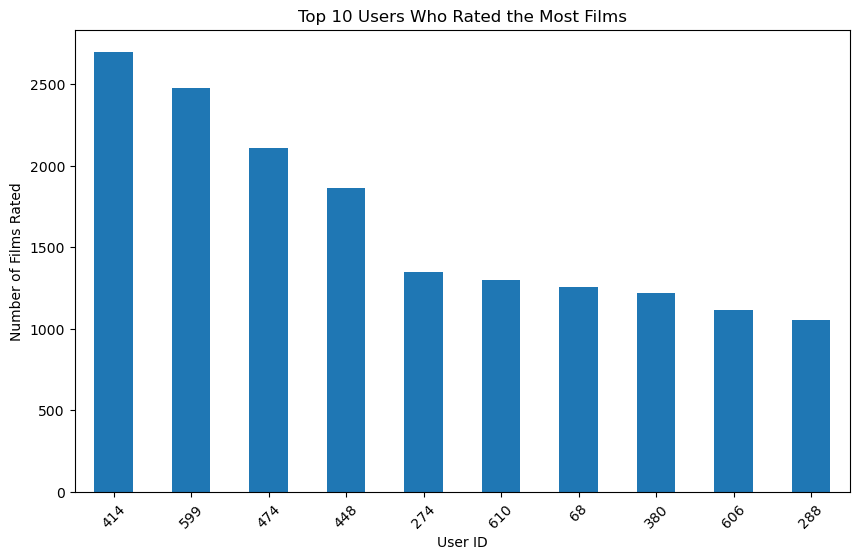

In [24]:
# Get the top 10 users who rated the most films
top_10_users = movie_rated_per_user.head(10)

# Visualize the top 10 users
plt.figure(figsize=(10, 6))
top_10_users.plot(kind='bar')
plt.xlabel('User ID')
plt.ylabel('Number of Films Rated')
plt.title('Top 10 Users Who Rated the Most Films')
plt.xticks(rotation=45)
plt.show()

**UserId 414 had rated the most movie titles(2698)**

In [25]:
# Top 10 Frequently rated movies
top_10_titles = merged_df['title'].value_counts().head(10)
top_10_titles

title
Forrest Gump                          329
Shawshank Redemption, The             317
Pulp Fiction                          307
Silence of the Lambs, The             279
Matrix, The                           278
Star Wars: Episode IV - A New Hope    251
Jurassic Park                         238
Braveheart                            237
Terminator 2: Judgment Day            224
Schindler's List                      220
Name: count, dtype: int64

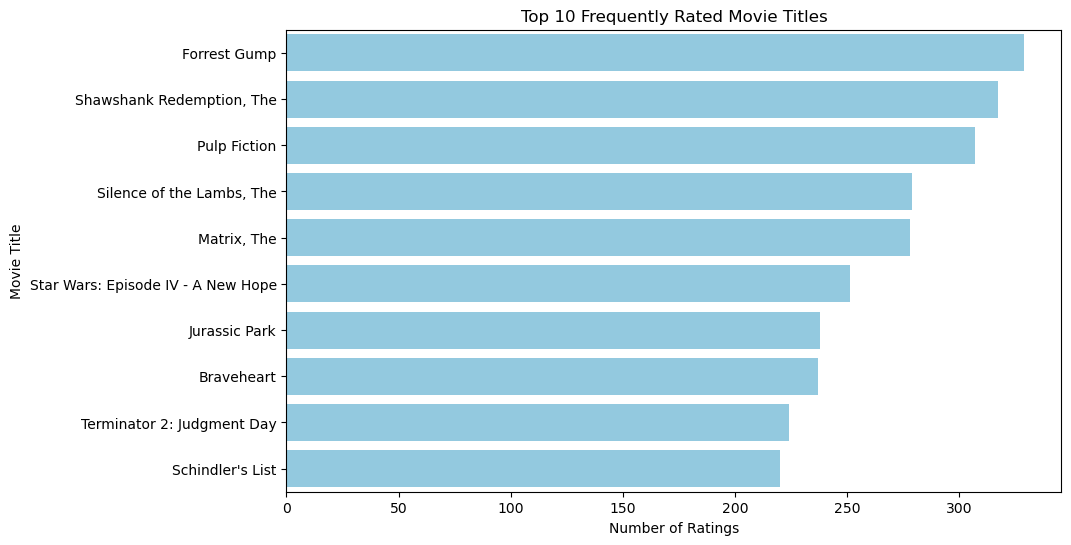

In [27]:
# Visualize the top 10 frequently rated movie titles
plt.figure(figsize=(10, 6))
sns.countplot(y='title', data=merged_df, order=top_10_titles.index, color='skyblue')
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Title')
plt.title('Top 10 Frequently Rated Movie Titles')
plt.show()

**The highest movie that was rated is Forrest Gump(329)**

### Categorical Analysis

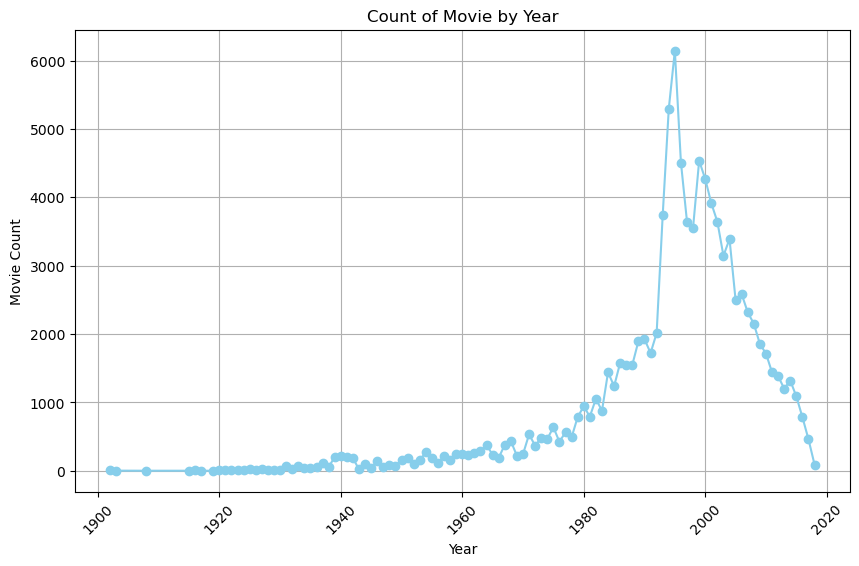

In [53]:
# Visualize the count of movie releases over the years
movie_releases_per_year = merged_df.groupby('year')['title'].count()
# Visualize average ratings by year using a line plot
plt.figure(figsize=(10, 6))
plt.plot(movie_releases_per_year.index, movie_releases_per_year.values, marker='o', linestyle='-', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Movie Count')
plt.title('Count of Movies by Year')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**In the late 1900's there was a mass production in movie releases then a decline in the production of movies in the early 2000's.**

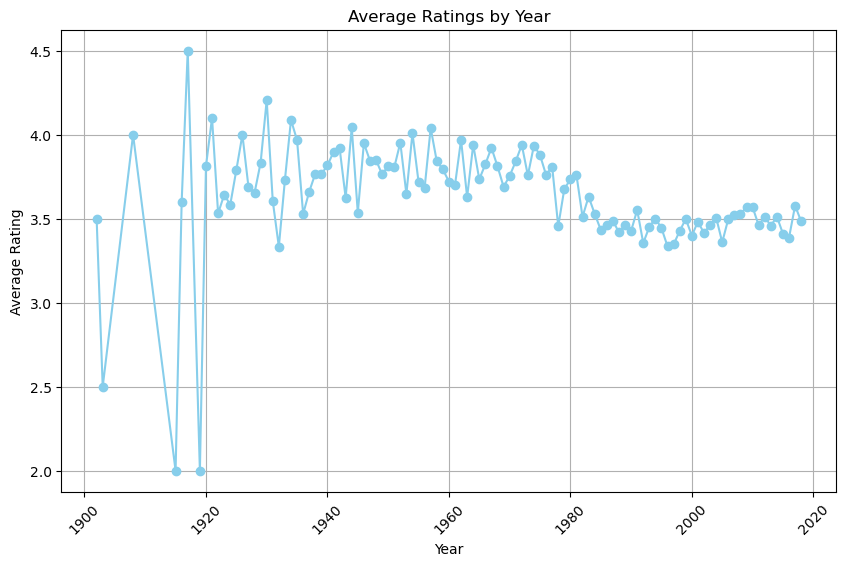

In [29]:
# Investigate patterns or trends in user ratings over time
merged_df['timestamp'] = pd.to_datetime(merged_df['timestamp'], unit='s')
merged_df['year'] = pd.to_datetime(merged_df['year'], format='%Y').dt.year
ratings_by_year = merged_df.groupby('year')['rating'].mean()

# Visualize average ratings by year using a line plot
plt.figure(figsize=(10, 6))
plt.plot(ratings_by_year.index, ratings_by_year.values, marker='o', linestyle='-', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Ratings by Year')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**We have major dips in the average rating from 1900-1920, further analysis can be conducted to see as to why such dips are there.**

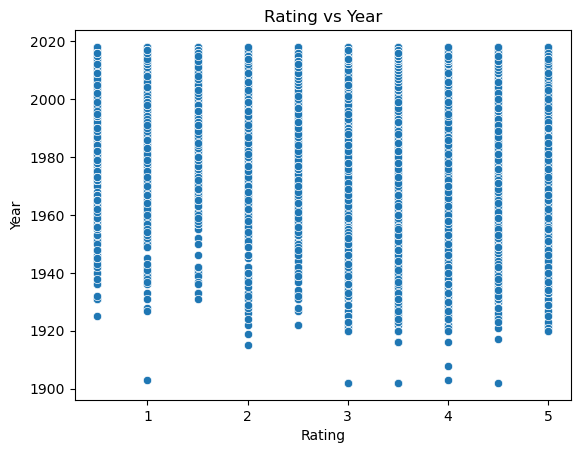

In [39]:
# Visulaizing the relationship on rating and year
sns.scatterplot(data = merged_df, x='rating', y='year')
plt.xlabel("Rating")
plt.ylabel("Year")
plt.title("Rating vs Year")
plt.show()

**As Observed we can see a few outliers in the above diagram.**

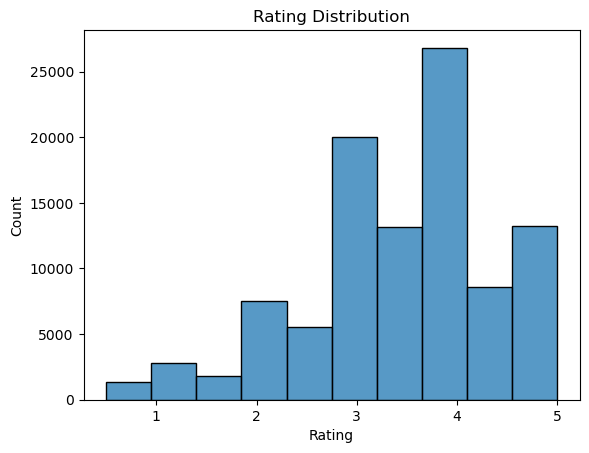

In [38]:
# Exploring rating Distribution

sns.histplot(data=merged_df, x = 'rating', bins=10)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Distribution')
plt.show()

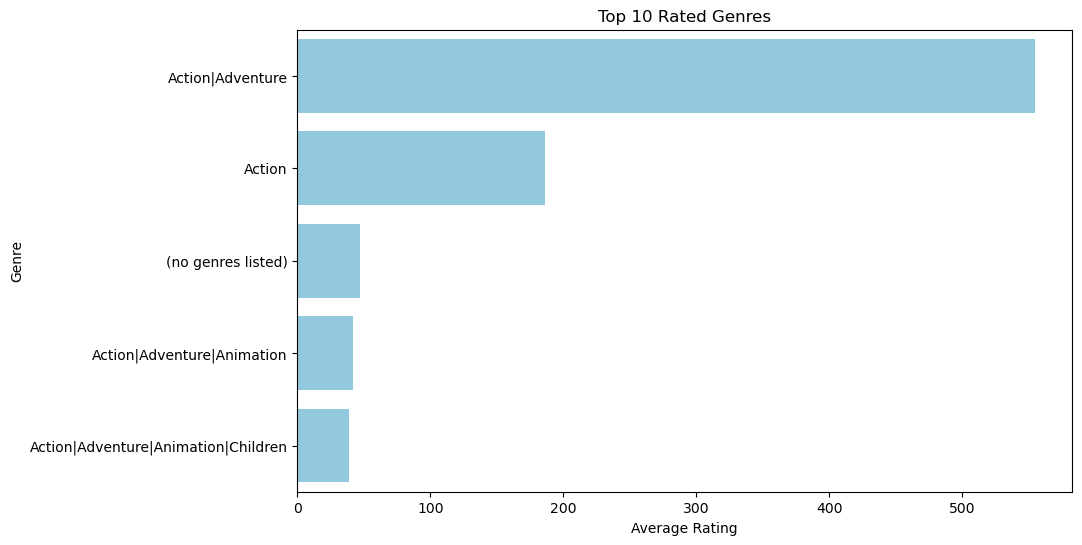

In [68]:
# Calculate average ratings for each genre
rating_genres = merged_df.groupby('genres')['rating'].count()

# select the top 10 rated genres
top_10_genres = rating_genres.head(5).sort_values(ascending=False)

# Visualize the top 10 rated genres using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_genres, y=top_10_genres.index, color='skyblue')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.title('Top 10 Rated Genres')
plt.show()

**Action and Adventure films are the highest rated genres.**

## Content based filtering

I need to build a recommendation system that suggests movies based on their content features. In this context, I will use the movie genre as well as rating as a content feature to recommend similar movies.

In [30]:
# Select the relevant columns: genres and rating
features_df = merged_df[['movieId', 'genres', 'rating']]

# Step 2: Feature Encoding
# Encode genres using binary variables
genres_encoded = features_df['genres'].str.get_dummies(sep='|')

# Concatenate the encoded genres with the rating column
encoded_features_df = pd.concat([features_df['movieId'], genres_encoded, features_df['rating']], axis=1)


# Step 3: Feature Scaling
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(encoded_features_df.iloc[:,1:])

# Step 4: PCA
pca = PCA(n_components=2)  # Specify the desired number of components
principal_components = pca.fit_transform(scaled_features)

# Step 5: Select Components
selected_components = principal_components[:, :2]  # Select the first two components

# Step 6: Content-Based Filtering
# Assuming you have a target movie ID for which you want to find similar movies
target_movie_id = 5
# Get the index of the target movie
target_movie_index = encoded_features_df.index[encoded_features_df['movieId'] == target_movie_id][0]

# Get the principal components for the target movie
target_movie_components = selected_components[target_movie_index]

# Compute the similarity between the target movie and all other movies
similarity_scores = cosine_similarity(selected_components, target_movie_components.reshape(1,-1))

# Sort the similarity scores in descending order
sorted_indices = similarity_scores.argsort(axis=0)[::-1].flatten()

# Get the top recommended movies based on similarity
top_movies = merged_df.loc[sorted_indices[:10], ['movieId', 'title', 'genres', 'rating']]

# Print the top recommended movies
print(top_movies)

       movieId                        title  genres  rating
17238    60756                Step Brothers  Comedy     5.0
26135      344   Ace Ventura: Pet Detective  Comedy     5.0
52576     2918     Ferris Bueller's Day Off  Comedy     5.0
89384   142422             The Night Before  Comedy     5.0
63289     3254              Wayne's World 2  Comedy     5.0
15495     3450               Grumpy Old Men  Comedy     5.0
15497     3450               Grumpy Old Men  Comedy     5.0
89437   162344   Tom Segura: Mostly Stories  Comedy     5.0
28261       88                  Black Sheep  Comedy     5.0
40355     5481  Austin Powers in Goldmember  Comedy     5.0


## Collaborative Filtering Techniques
I will use the ratings column to identify similar users and recommend movies based on their preferences. 

In [31]:
# Drop unnecessary columns
new_df = merged_df.drop(columns='timestamp')
new_df.head()

,userId,movieId,rating,title,genres,year
0,1,1,4.0,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0
1,5,1,4.0,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0
2,7,1,4.5,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0
3,15,1,2.5,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0
4,17,1,4.5,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0


## Modelling
### Model 1: Baseline Model(SVD)

In [32]:
# First we create a reading object
reader = Reader(rating_scale=(0.5, 5.0))

# We then load the data into a Surprise Dataset
data = Dataset.load_from_df(new_df[['userId', 'movieId', 'rating']], reader)


In [33]:
dataset = data.build_full_trainset()
print('Number of users: ', dataset.n_users, '\n')
print('Number of items: ', dataset.n_items)

Number of users:  610 

Number of items:  9724


In [34]:
# Split the data into training and test as usually to train and evaluate
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Initialise the model which in this case is Singular value decomposition
baseline_model = SVD()

baseline_model.fit(trainset)

predict = baseline_model.test(testset)

# Calculating RMSE
accuracy.rmse(predict)
accuracy.mae(predict)

RMSE: 0.8725
MAE:  0.6691


0.6690580957527394

I used SVD(Matrix Factorization Method):
- Dimensionality Reduction - By reducing the computational complexity hence improve efficiency.
- To decompose user-item rating matrices which can be used to make personalized recommendations by predicting missing ratings. 
Fair enough values RMSE(0.87) and MAE(0.67).

In [35]:
# Function to get movie recommendations based on a given movie title
def get_movie_recommendations(movie_title, model, top_n=5):
    """
    Gives top n movie recommendations based on a movie watched.

    Parameters:
    movie_title : The title of the movie that the user has watched.
    model : The model used to generate recommendations.
    top_n : The number of recommendations to return. Default value is 5.

    Returns:
    The top n recommendations based on the user's input.
    """
    # Get the movieId of the given movie title
    movie_id = new_df[new_df['title'] == movie_title]['movieId'].iloc[0]

    # Get a list of user IDs who have rated the given movie
    users_who_watched = new_df[new_df['movieId'] == movie_id]['userId'].unique()

    # List to store recommendations based on the user's input movie
    recommendations = []

    # Generate recommendations for each user who watched the given movie
    for user_id in users_who_watched:
        # Get a list of movie IDs that the user has not rated yet
        unrated_movies = new_df[(new_df['userId'] == user_id) & (new_df['movieId'] != movie_id)]['movieId'].unique()

        # Predict ratings for unrated movies
        for unrated_movie_id in unrated_movies:
            predicted_rating = model.predict(user_id, unrated_movie_id).est
            recommendations.append((unrated_movie_id, predicted_rating))

    # Sort the recommendations by predicted rating in descending order
    recommendations.sort(key=lambda x: x[1], reverse=True)

    # Get the top N movie recommendations
    top_recommendations = recommendations[:top_n]

    # Print the top recommendations
    print(f"Top {top_n} movie recommendations based on '{movie_title}':")
    for movie_id, predicted_rating in top_recommendations:
        movie_title = new_df[new_df['movieId'] == movie_id]['title'].iloc[0]
        print(f"Movie: {movie_title}, Predicted Rating: {predicted_rating}")

In [36]:
recommendations = get_movie_recommendations('Toy Story', baseline_model, top_n=5)
print(recommendations)

Top 5 movie recommendations based on 'Toy Story':
Movie: Forrest Gump, Predicted Rating: 5.0
Movie: Reservoir Dogs, Predicted Rating: 5.0
Movie: Monty Python and the Holy Grail, Predicted Rating: 5.0
Movie: Star Wars: Episode V - The Empire Strikes Back, Predicted Rating: 5.0
Movie: L.A. Confidential, Predicted Rating: 5.0
None


### Model 2: SVD Hyperparameter tuning

In [69]:
## Perform a gridsearch with SVD
params = {'n_factors': [20, 50, 100],
          'n_epochs': [5, 10, 20], 
          'lr_all': [0.01, 0.1],
          'reg_all': [0.02, 0.05, 0.01]}

g_s_svd = GridSearchCV(SVD,param_grid=params,n_jobs=-1)
g_s_svd.fit(data)

In [ ]:
print(g_s_svd.best_score)
print(g_s_svd.best_params)

{'rmse': 0.8589603087976443, 'mae': 0.6588557786070932}
{'rmse': {'n_factors': 100, 'n_epochs': 20, 'lr_all': 0.01, 'reg_all': 0.05}, 'mae': {'n_factors': 100, 'n_epochs': 20, 'lr_all': 0.01, 'reg_all': 0.05}}


In [ ]:
Grid_s_model = SVD(n_factors=100,n_epochs=20, lr_all=0.01, reg_all=0.05)

Grid_s_model.fit(trainset)

predict = Grid_s_model.test(testset)


In [ ]:
recommendations = get_movie_recommendations('Forrest Gump', Grid_s_model, top_n=5)
print(recommendations)

Top 5 movie recommendations based on 'Forrest Gump':
Movie: Monty Python and the Holy Grail, Predicted Rating: 5.0
Movie: Princess Bride, The, Predicted Rating: 5.0
Movie: Young Frankenstein, Predicted Rating: 5.0
Movie: Fugitive, The, Predicted Rating: 5.0
Movie: Willy Wonka & the Chocolate Factory, Predicted Rating: 5.0
None


**After tuning my SVD model and using the best parameters my RMSE(0.86) and MAE(0.66) values slighlty drop as compared to without tuning.**

### Model 3:Non Negative Matrix Factorization(NMF)

In [ ]:
model3 = NMF()
model3.fit(trainset)
predict3 = model3.test(testset)

# Calculating RMSE
accuracy.rmse(predict3)
accuracy.mae(predict3)

RMSE: 0.9264
MAE:  0.7057


0.7056542809817506

#### NMF(Hyperparameter tuned)

In [ ]:
# Define the parameter grid for grid search
param_grid = {'n_factors': [5, 10, 15], 'n_epochs': [10, 20, 30], 'reg_pu': [0.06, 0.08, 0.1], 'reg_qi': [0.06, 0.08, 0.1]}

# Perform grid search with cross-validation
gs = GridSearchCV(NMF, param_grid, cv=3)
gs.fit(data)

In [ ]:
print(gs.best_score)
print(gs.best_params)

{'rmse': 0.917767308237492, 'mae': 0.7039086161691105}
{'rmse': {'n_factors': 15, 'n_epochs': 30, 'reg_pu': 0.1, 'reg_qi': 0.1}, 'mae': {'n_factors': 15, 'n_epochs': 20, 'reg_pu': 0.1, 'reg_qi': 0.08}}


**RMSE(0.92) and MAE(0.70). Another Matrix factorization method like NMF was perfromed to reduce dimensionality to see if the values might improve. Which they didnt.**

In [ ]:
Grid_gs_model = NMF(n_factors=15,n_epochs=30, reg_pu=0.1, reg_qi=0.01)

Grid_gs_model.fit(trainset)

predict = Grid_gs_model.test(testset)


In [ ]:
recommendations = get_movie_recommendations('Forrest Gump', Grid_gs_model, top_n=5)
print(recommendations)

Top 5 movie recommendations based on 'Forrest Gump':
Movie: Heat, Predicted Rating: 5.0
Movie: Usual Suspects, The, Predicted Rating: 5.0
Movie: Bottle Rocket, Predicted Rating: 5.0
Movie: Braveheart, Predicted Rating: 5.0
Movie: Star Wars: Episode IV - A New Hope, Predicted Rating: 5.0
None


### Model 4: KNNBasic Model

In [ ]:
# cross validating with KNNBasic
similarity_options = {'name': 'cosine', 'user_based': True}
knn_model = KNNBasic(sim_options=similarity_options)

knn_model.fit(trainset)

predict = knn_model.test(testset)

cv_knn_model = cross_validate(knn_model, data, n_jobs=-1)


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.


In [ ]:
for i in cv_knn_model.items():
    print(i)
print('-----------------------')
print(np.mean(cv_knn_model['test_rmse']))

('test_rmse', array([0.97784987, 0.97479484, 0.97044966, 0.96935344, 0.96980477]))
('test_mae', array([0.75213927, 0.75131644, 0.74659677, 0.74557324, 0.7476267 ]))
('fit_time', (0.8346970081329346, 0.7162768840789795, 1.0363309383392334, 1.0620818138122559, 0.6003038883209229))
('test_time', (4.531691551208496, 4.076889753341675, 4.530614137649536, 3.92345929145813, 2.3014039993286133))
-----------------------
0.9724505134373829


**Best RMSE(0.97) and MAE(0.75). KNNBasic suffers from sparsity of data and scalabilty issues hence the high values.**

In [ ]:
recommendations = get_movie_recommendations('Toy Story', knn_model, top_n=5)
print(recommendations)

Top 5 movie recommendations based on 'Toy Story':
Movie: Gulliver's Travels, Predicted Rating: 5.0
Movie: Far From Home: The Adventures of Yellow Dog, Predicted Rating: 5.0
Movie: Ponette, Predicted Rating: 5.0
Movie: Far From Home: The Adventures of Yellow Dog, Predicted Rating: 5.0
Movie: Dylan Moran: Monster, Predicted Rating: 5.0
None


### Model 5: KNN Baseline Model

In [ ]:
# cross validating with KNNBaseline
similarity_options = {'name': 'cosine', 'user_based': True}
knn_baseline = KNNBaseline(sim_options=similarity_options)
knn_baseline.fit(trainset)

predict = knn_baseline.test(testset)

cv_knn_baseline = cross_validate(knn_baseline, data, n_jobs=-1)

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.


In [ ]:
for i in cv_knn_baseline.items():
    print(i)

np.mean(cv_knn_baseline['test_rmse'])

('test_rmse', array([0.89083139, 0.88033052, 0.87632974, 0.87783932, 0.87482543]))
('test_mae', array([0.68022165, 0.67416921, 0.66916142, 0.67299534, 0.67056717]))
('fit_time', (1.067885398864746, 1.3067994117736816, 1.5607109069824219, 1.0231430530548096, 0.7992241382598877))
('test_time', (5.730794668197632, 5.380290746688843, 4.886886358261108, 4.766862869262695, 2.282874345779419))


0.8800312789436774

**Best RMSE(0.87) and MAE(0.67) - KNNBaseline uses the nearest neighbors to make predictions based on similarities between users or items. The values are closely similar to SVD after tuning.**

In [ ]:
recommendations = get_movie_recommendations('Toy Story', knn_baseline, top_n=5)
print(recommendations)

Top 5 movie recommendations based on 'Toy Story':
Movie: Goodfellas, Predicted Rating: 5.0
Movie: Matrix, The, Predicted Rating: 5.0
Movie: Gulliver's Travels, Predicted Rating: 5.0
Movie: Fight Club, Predicted Rating: 5.0
Movie: Ponette, Predicted Rating: 5.0
None


### Model 6: Multi-Layer Perceptron(MLP)

In [ ]:

# Load and preprocess the data

new_df['rating'] = scaler.fit_transform(new_df['rating'].values.reshape(-1, 1))

# Split the data into training and testing sets
train_data, test_data = train_test_split(new_df, test_size=0.2)

# Create input and output variables
train_X = train_data[['userId', 'movieId']].values
train_y = train_data['rating'].values
test_X = test_data[['userId', 'movieId']].values
test_y = test_data['rating'].values

# Define the MLP model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(train_X, train_y, epochs=5, batch_size=32)

# Make predictions on the testing set
y_pred = model.predict(test_X)

# Inverse transform the scaled predictions and ground truth values
y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1))
test_y_inv = scaler.inverse_transform(test_y.reshape(-1, 1))

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(test_y_inv, y_pred_inv))
mae = mean_absolute_error(test_y_inv, y_pred_inv)

# Print the RMSE and MAE
print("RMSE:", rmse)
print("MAE:", mae)


2023-09-17 14:40:08.679566: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-17 14:40:09.264786: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-17 14:40:09.269292: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-17 14:40:10.822355: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Epoch 1/5
2521/2521 [==============================] - 4s 1ms/step - loss: 1.0600
Epoch 2/5
2521/2521 [==============================] - 3s 1ms/step - loss: 0.9994
Epoch 3/5
2521/2521 [==============================] - 3s 1ms/step - loss: 0.9994
Epoch 4/5
2521/2521 [==============================] - 3s 1ms/step - loss: 0.9994
Epoch 5/5
631/631 [==============================] - 1s 793us/step
RMSE: 1.0438116486350264
MAE: 0.8289027992622666


MLP(Multi-Layer Perceptron) - Is a type of articificial neural network consisting of multiple layers of interconnected nodes. Often used where user and item features are used to make predictions.RMSE(1.04) and MAE(0.83)

## CONCLUSION

**EDA:**

Action|Adventure is the highest rated genre.

Content based filtering - Addressed the cold start problem where there is linited or no user data available for new users. Thus by analyzing content by genre and the ratings provided i managed to create a recommendation system based on similarities to the items.

**Modelling:**

Matrix factorization(SVD baseline model and NMF) the SVD perfromed much better as compared to the other models (RMSE 0.85, MAE 0.66), the lower values indicate better accuracy and perfromance.

## RECOMMENDATIONS

Further analysis should be done by feature selection and engineering and also perfrom some ensemble methods to improve on the metrics of success of the models.

Getting more data on user feedback and user satisfaction also will aid in the improvement of the recommendation system.